# Loading the dataset

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1izAYScZGiWfis_xXRoGwqgFlhCsPeu5R' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

# Installing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('dark')
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
df = pd.read_csv('tweet_data.csv', lineterminator='\n')
df = df.drop(['Unnamed: 0'],axis=1)

# Sentiment Analysis using TextBlob

In [ ]:
df['TBScore'] = df['Clean Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Convert polarity score into sentiment categories
df['Sentiment'] = df['TBScore'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [ ]:
df.sample(10)

,Datetime,Text,Username,Like Count,Display Name,Clean Text,TBScore,Sentiment
42192,2021-09-02,AdventHealth Orlando’s Chief Medical Officer: ...,MrTimm4,2,MrTimm,adventhealth orlandos chief medical officer i ...,0.366667,Positive
464567,2021-09-15,@johnferrugia Preventable harm. That’s what we...,comilla_s,4,Dr. Comilla,preventable harm that is what we are calling ...,0.266667,Positive
15289,2021-09-01,@trutherbotnet Also the vaccine enhances your ...,ThebetterJD,0,✯Sᵿpгєmє✯ℍєgєmѻη✯ĴĐ,also the vaccine enhances your antibodies to ...,-0.029167,Neutral
867932,2021-09-29,"@LovesTheWords I'm against mandates, period. W...",Real_AnnaBird,0,Billionaires SUCK💥 #Medicare4All,I am against mandates period with this vaccin...,-0.143333,Negative
299313,2021-09-10,#Kenyan President Uhuru Kenyatta and his #Esto...,MwanzoTv,24,MwanzoTV,kenyan president uhuru kenyatta and his estoni...,0.000000,Neutral
199069,2021-09-08,@1logicalmind @Jeffhull71 @GovRonDeSantis Noth...,LeeH1955,1,Lee Edgerley,nothing is free the cost of regeneron to the...,0.194444,Positive
664070,2021-09-21,@LouDella @makaveligangsta @MallardBeakman If ...,JerryAnders1,0,Jerry Andres🌊🌊,if you do not get the vaccine and get covid ...,0.000000,Neutral
616990,2021-09-20,Not sure what I’m more excited about… #Electio...,suki50,0,Susan King,not sure what I am more excited about election...,0.281250,Positive
492987,2021-09-16,@ptvedry @bigSmoothBrain @hasanthehun she neve...,Barb19780266,0,Chun-Li ᴺᴹ,she never said it was ineffective the lies s...,-0.175000,Negative
730191,2021-09-24,so now Joe is going to destroy our Military? \...,corrrugatediowa,0,barbara lockard,so now joe is going to destroy our military \n...,-0.150000,Negative


**Polarity frequency**

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text major ticklabel objects>)

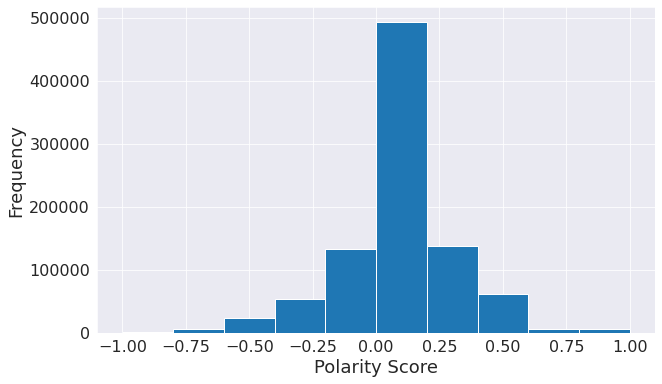

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['TBScore'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Making wordclouds**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid', 'via', 'v','a','c','c','i','n','e', 'vaccinated', 'people', 'get','getting','vaccination', 'amp', 'vaccine', 'covid19', 'covidvaccine']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


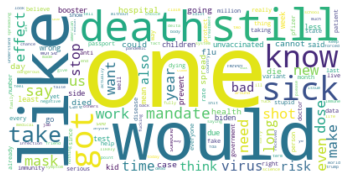

In [ ]:
pos_tweets=df[df["Sentiment"]=="Positive"]
txt=" ".join(tweet for tweet in pos_tweets["Clean Text"])
import re

wordcloud = WordCloud(collocations = False,
                      background_color = 'white',
                      stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

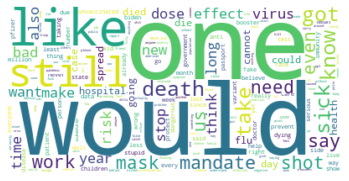

In [ ]:
neg_tweets=df[df["Sentiment"]=="Negative"]
txt=" ".join(tweet.lower() for tweet in neg_tweets["Clean Text"])

wordcloud = WordCloud(collocations = False,background_color = 'white',stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Graphing the people's opinions**

In [ ]:
def get_value_counts(col_name):
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df

In [ ]:
tb_sentiment_df = get_value_counts('Sentiment')
tb_sentiment_df

,sentiment,counts,percentage
0,Negative,184421,20.02
1,Neutral,334159,36.27
2,Positive,402661,43.71


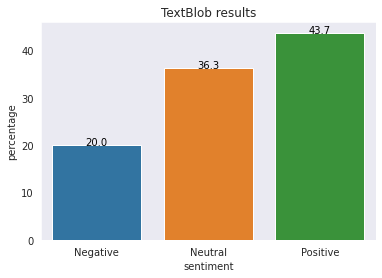

In [ ]:
ax = sns.barplot(x="sentiment", y="percentage", data=tb_sentiment_df)
ax.set_title('TextBlob results')

for index, row in tb_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

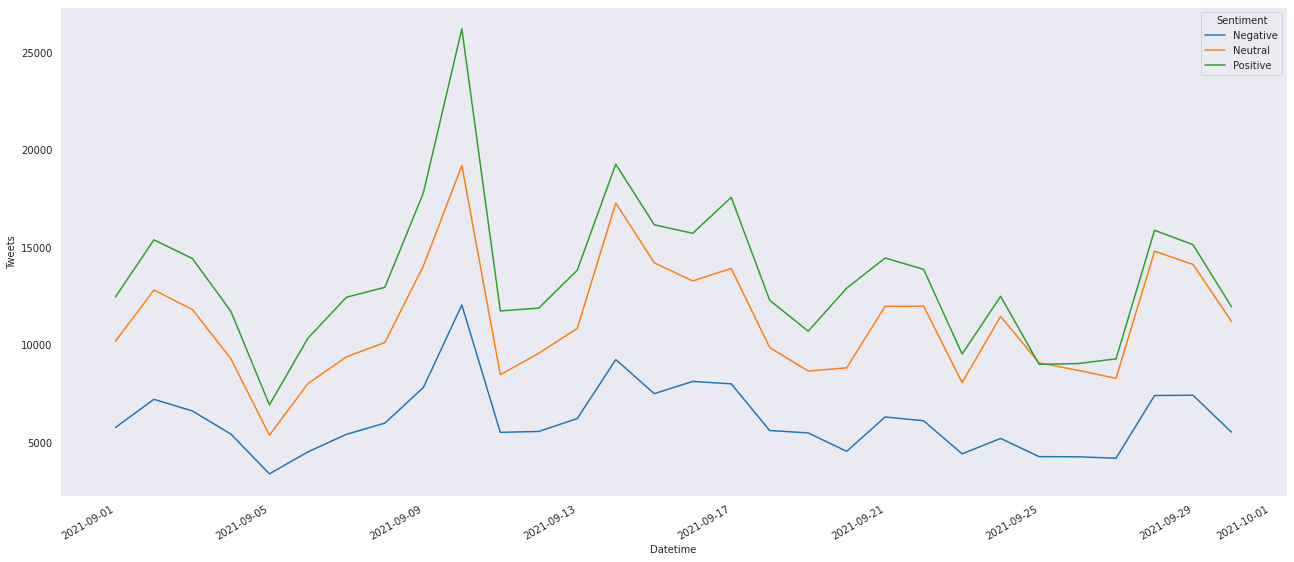

In [ ]:
# Plotting timeseries plot
df["Datetime"] = pd.to_datetime(df.Datetime) 
timeline = df.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()

**Checking out top 10 negative tweets**

In [ ]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='TBScore', ascending=True)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)

,Text,TBScore,Username
0,@joerogan Hey Joe you should have another version of Fear Factor called Fear Factor: Choose Your Poison. Contestants will choose between two fears. They might have to choose to eat something disgusting or get the covid vaccine.,-1.0,nobull145
1,"@NicolaSturgeon @ScotParl Vaccine passports in Scotland, tell us the point of this when the vaccinated still spread and catch covid, this does not stop the spread. Disgusting",-1.0,JillianMacrae3
2,Vietnam Approves Cuba’s Abdala Vaccine Amid Its Worst Covid Outbreak https://t.co/LvH2iblUM7,-1.0,ReformerNews1
3,@WellstarHealth what are you going to do about your surgical tech Jessica Renzi? She’s disgusting for comparing the Holocaust to getting the COVID 19 vaccine 😳,-1.0,MsPHopkins
4,"Because with valuable treatments for Covid they can't force their "" vaccines"" on us. It's actually very evil what they're doing. https://t.co/rz9Xe8LmO3",-1.0,McKaylaRoseJ
5,SHOCKING REVELATION - Doctor Exposes Covid Bioweapons Program &amp; Reveals Vaccine Will Kill MILLIONS. https://t.co/RG9FkfKXbI,-1.0,tmnetherton
6,Vietnam Approves Cuba’s Abdala Vaccine Amid Its Worst Covid Outbreak https://t.co/zyoda0bHZs,-1.0,ReformerNews1
7,@SkyNews This is madness. Kids have virtually no risk to covid yet we are givin them a vaccine to it. Insane 🤷🏼‍♂️🤷🏼‍♂️,-1.0,dl260785
8,#Vietnam Approves Cuba's Abdala Vaccine Amid Its Worst Covid Outbreak.\n#BreakingNews #News #EffortlessNews #India #IndianNews #NewsUpdate https://t.co/g8IW7inERA,-1.0,Effortless_News
9,@talkRADIO The Covid vaccine has become a god to people. It’s pathetic.,-1.0,Jake___7


**Checking out top 10 positive tweets**

In [ ]:
df.sort_values(by='TBScore', ascending=False)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)


,Text,TBScore,Username
0,"Vaccines are truly our best shot to beat COVID-19. Join @Network18 #Sanjeevani - A Shot Of Life, a @FederalBankLtd CSR initiative to spread vaccine awareness across the country, and get vaccinated soon. Vaccine #LagayaKya @Apollo24x7 @UWMumbai https://t.co/MyfonuPFu8",1.0,News18Kannada
1,"Vaccines are truly our best shot to beat COVID-19. Join @Network18 #Sanjeevani - A Shot Of Life, a @FederalBankLtd CSR initiative to spread vaccine awareness across the country, and get vaccinated soon. Vaccine #LagayaKya @Apollo24x7 @UWMumbai https://t.co/wN4GWjW6X8",1.0,HindiNews18
2,Blockchain would have been an excellent technology choice for issuing COVID vaccine certificate.,1.0,anandmallaya
3,Covid doesn't exist and vaccines are poison is the best answer ever. https://t.co/fEgO7LPJjp,1.0,DanEvans1986
4,"‘Impressive’ start for B.C. vaccine card, COVID hospitalizations increase https://t.co/yVbkMzSIMZ https://t.co/6wEyGPhVHw",1.0,VernonMattersca
5,"@wmarshcc8 Bill, did you listen to my speech? Nowhere did I say don’t get the vaccine, I encouraged everyone to talk to their physicians and make the decision best for them. I won’t support a mandate, when I got the vaccine I was lead to believe it would keep me from getting covid again.",1.0,kimberlyarice1
6,@TomiLahren Did you stomp your foot when you tweeted that? Covid vaccines have been given to over 2 billion people. It’s safety profile is excellent.,1.0,Nimrod247
7,"World's Largest Vaccination Drive: \n\nIn a magnificent feat, India administers 85 Crore COVID-19 Vaccines.\n\n@mansukhmandviya @MoHFW_INDIA https://t.co/nWOqJ7sqv1",1.0,airworldservice
8,CDC says Moderna vaccine staying especially effective. COVID updates https://t.co/ImaLATgpSA,1.0,Humming_Zone
9,"Oregonians who have received two doses of the Pfizer or Moderna vaccines, or one dose of the Johnson &amp; Johnson vaccine, continue to have excellent protection from COVID-19. #CovidVaccine \nhttps://t.co/lxcuFwslnL",1.0,OHSUNews
